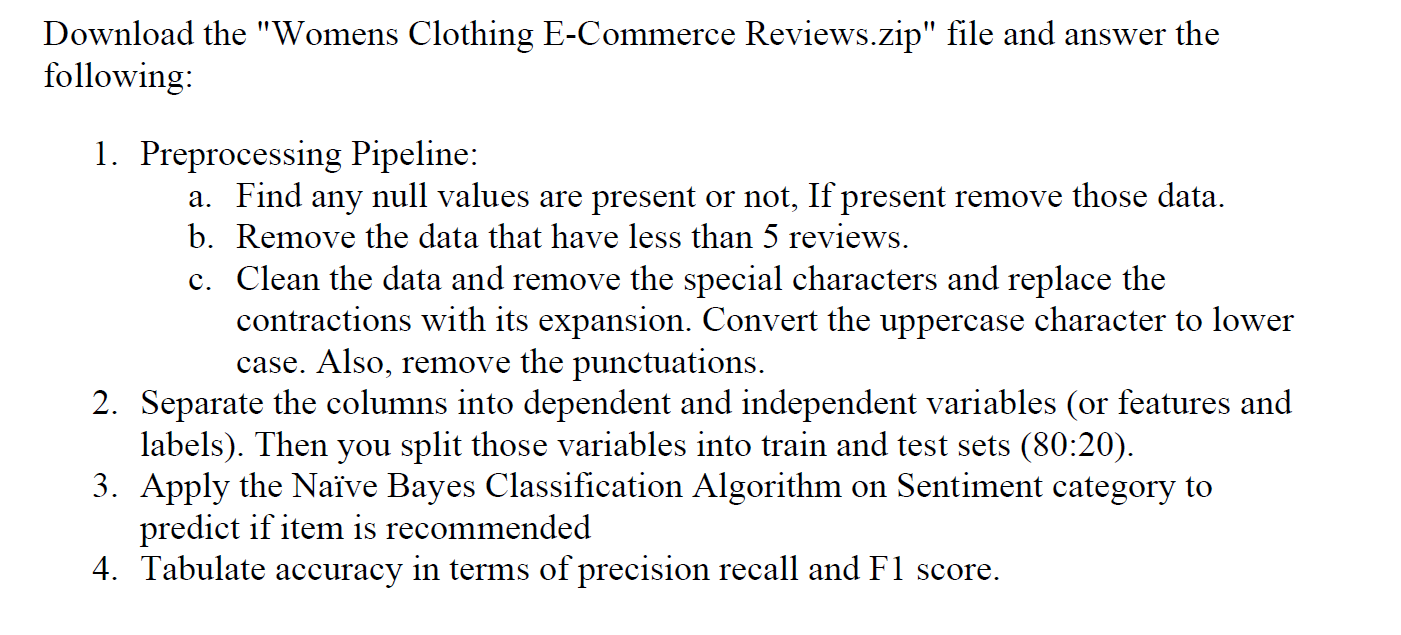

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Q1 - Download the "Womens Clothing E-Commerce Reviews.zip" file and answer the following:

In [ ]:
df = pd.read_csv("C:\\Users\\gouri\\OneDrive\\Desktop\\Womens Clothing E-Commerce Reviews\\Womens Clothing E-Commerce Reviews.csv", skipinitialspace = True)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Category,Recommended IND
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,0,Initmates,Intimate,Intimates,1
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,4,General,Dresses,Dresses,1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,General Petite,Bottoms,Pants,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,6,General,Tops,Blouses,1


In [ ]:
df.isna().any()

Unnamed: 0                 False
Clothing ID                False
Age                        False
Title                       True
Review Text                 True
Rating                     False
Positive Feedback Count    False
Division Name               True
Department Name             True
Category                    True
Recommended IND            False
dtype: bool

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Positive Feedback Count       0
Division Name                14
Department Name              14
Category                     14
Recommended IND               0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
total = df['Clothing ID'].value_counts()

In [ ]:
df['total'] = 0

for i in df['Clothing ID'].unique():
    df.loc[df['Clothing ID'] == i, 'total'] = df['Clothing ID'].value_counts()[i]

# Q1b - Remove the data that have less than 5 reviews

In [ ]:
df.shape

(19662, 12)

In [ ]:
#Keep the data with more than 5 reviews
df = df[df['total'] > 5]

In [ ]:
df.shape

(18206, 12)

In [ ]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Positive Feedback Count,Division Name,Department Name,Category,Recommended IND,total
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,0,251
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,General Petite,Bottoms,Pants,1,25
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,4,General,Dresses,Dresses,0,241
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,1,18
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,4,General Petite,Tops,Knits,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,0,General Petite,Dresses,Dresses,1,147
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,0,General Petite,Tops,Knits,1,658
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,1,General Petite,Dresses,Dresses,0,147
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,2,General,Dresses,Dresses,1,64


# Q1c - Clean the data and remove the special characters and replace the contractions with its expansion. Convert the uppercase character to lower case. Also, remove the punctuations.

In [ ]:
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

In [ ]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [ ]:
df["Review Text"] = df["Review Text"].apply(lambda x:cont_to_exp(x))

In [ ]:
def upper_to_lower(x):
    if type(x) is str:
        return x.lower()
    else:
        return x

In [ ]:
df['Review Text'] = df['Review Text'].apply(lambda x:upper_to_lower(x))

In [ ]:
import string
def remove_punctuations(text):
    if type(text) is str:
        for p in string.punctuation:
            text = text.replace(p, '')
        return text
    else:
        return text 

In [ ]:
df['Review Text'] = df['Review Text'].apply(lambda x:remove_punctuations(x))

In [ ]:
def remove_special_chars(text):
    special_chars = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    if type(text) is str:
        for p in special_chars:
            text = text.replace(p, '')
        return text
    else:
        return text

In [ ]:
df['Review Text'] = df['Review Text'].apply(lambda x:remove_special_chars(x))

In [ ]:
from textblob import TextBlob
df['polarity_title'] = df['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['polarity_review'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'Clothing ID', 'Review Text', 'Title', 'Department Name', 'Division Name', 'Category'])

# Q2 - Separate the columns into dependent and independent variables (or features and labels). Then split those variables into train and test sets (80:20).

In [ ]:
x = df.drop(columns=['Recommended IND'])
y = df['Recommended IND']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [ ]:
#For every column chosen in x, if the datatype is of int or float, consider it to be a numerical column
#The rest are considered to be categorical (object can mean mixed types in python)
numerical = [col for col in x.columns if x[col].dtype in ['int64', 'float64']] 
categorical = [col for col in x.columns if x[col].dtype == 'object']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

numerical_transformer = Pipeline(steps = [
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('vectorizer', CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=10)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical),
        ('cat', categorical_transformer, categorical),
      ])

#Creating preprocess column transformer to transform numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical),
        ('cat', categorical_transformer, categorical),
      ])

# Q3 - Apply the Naïve Bayes Classification Algorithm on Sentiment category to predict if item is recommended.

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()

In [ ]:
pl = Pipeline(steps=[  ('preprocessor', preprocessor), 
                       ('naive', naive)])

In [ ]:
pl.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Rating',
                                                   'Positive Feedback Count',
                                                   'total', 'polarity_title',
                                                   'polarity_review']),
                                                 ('cat',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorizer(max_features=10,
                                                                                   ngram_range=(1,
                                                                                                2),
              

In [ ]:
y_hat = pl.predict(x_test)

# Q4.Tabulate accuracy in terms of precision recall and F1 score.

In [ ]:
pl.score(x_test, y_test)

0.9308072487644151

<AxesSubplot:>

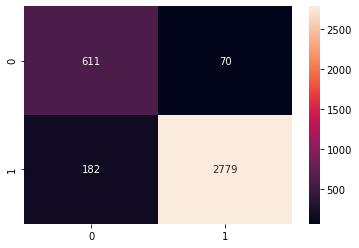

In [ ]:
#top left = True Positive
#top right = false positive
#bottom left = false negative
#bottom right = true negative
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, y_hat)
sns.heatmap(matrix, annot = True, fmt = 'g')

<AxesSubplot:>

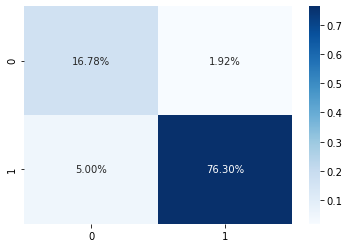

In [ ]:
#Representing the same numbers as percentages of the test set: 
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
#Precision = True Positive/(True Positive + False Positive)
precision = matrix[0,0] / matrix[0, :].sum()
precision

0.8972099853157122

In [ ]:
#Sensitivity = Recall = True Positive Rate = True Positive/ (True Positive + False Negative)
true_positive_rate = matrix[0,0] / matrix[:, 0].sum()
true_positive_rate

0.7704918032786885

In [ ]:
#F1 score = (2 * Precision * Recall) / (Precision + Recall)
F1_score = (2 * precision * true_positive_rate)/(precision + true_positive_rate)
F1_score

0.8290366350067843